In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
from IPython.display import IFrame
import folium # pip install folium
from folium import plugins
import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
# guarda en variables los datasets y su fuente
# Fuente sacada de https://www.idealista.com/alquiler-viviendas/madrid-madrid con web-scraping 2023
fuente_1 = "../../data/rentaMadrid2023Idealista.csv"
df_idealista = pd.read_csv(fuente_1, sep=";")


In [8]:
df_idealista

,Direction,Price,m2,Floor,Room,Description
0,"Estudio en calle de Tarragona, 36, Palos de M...",675.0,NaN,1,0,"Estudio, cocina equipada con electrodoméstico..."
1,"Piso en paseo de Santa María de la Cabeza, Pa...",2700.0,111.0,1,3,Piso Reformado con Patio Privativo en el Cent...
2,"Piso en calle Gran Via de Hortaleza, 5, Pinar...",1650.0,120.0,2,3,"Piscina de invierno y de verano, gimnasio, 2 ..."
3,"Piso en calle del Conde de Xiquena, Chueca-Ju...",5495.0,233.0,4,2,MARAVILLOSO Y LUMINOSO APARTAMENRO DE 2 HABIT...
4,"Piso en calle de José Gutiérrez Maroto, 3, En...",900.0,67.0,6,2,Piso en muy buen estado y muy soleado. Junto ...
...,...,...,...,...,...,...
325,"Piso en Castellana, Madrid",4200.0,230.0,5,2,La Inmobiliaria Internacional CPM gestiona es...
326,"Piso en German Pérez Carrasco, Quintana, Madrid",900.0,50.0,2,2,"¿Estás buscando una vivienda luminosa, recién..."
327,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...
328,"Estudio en calle del Manco de Lepanto, Numanc...",630.0,NaN,3,0,POR FAVOR LEER TODA LA DESCRIPCIÓN DEL ANUNCI...


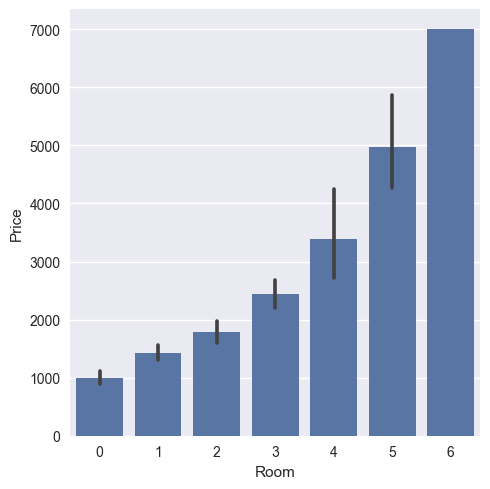

In [9]:
sns.catplot(df_idealista, y='Price', x='Room', kind="bar")

In [10]:
df_idealista.describe()

,Price,m2,Floor,Room
count,330.000000,304.000000,330.000000,330.000000
mean,2065.718182,109.351974,2.851515,2.169697
std,1373.968271,75.237519,2.818590,1.190766
min,630.000000,26.000000,0.000000,0.000000
25%,1100.000000,63.750000,1.000000,1.000000
50%,1547.500000,85.500000,2.000000,2.000000
75%,2700.000000,125.250000,4.000000,3.000000
max,10000.000000,650.000000,22.000000,6.000000


In [11]:
df_idealista.dtypes

Direction       object
Price          float64
m2             float64
Floor            int64
Room             int64
Description     object
dtype: object

(-10.0, 10000.0)

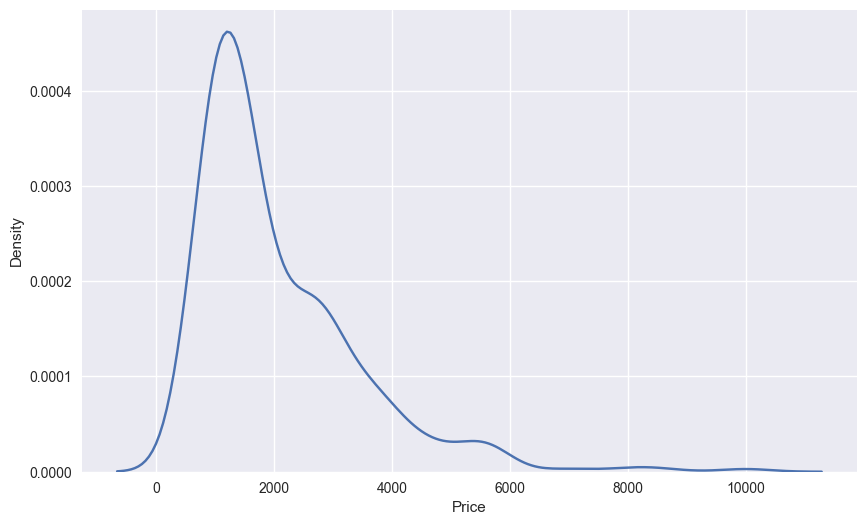

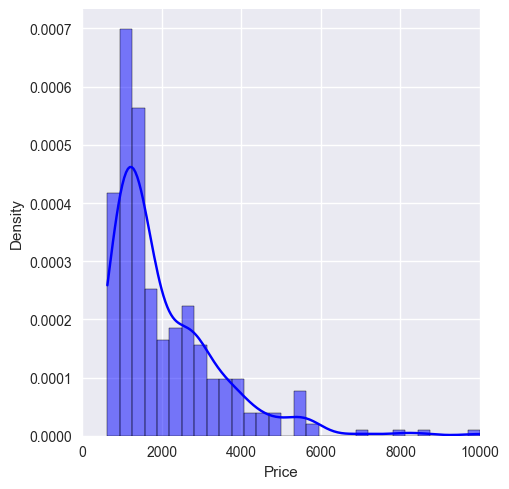

In [12]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_idealista["Price"]);
sns.displot(df_idealista["Price"],
             kde=True,
             stat="density",
             color='b',
             bins=30);
plt.xlim(-10,10000)

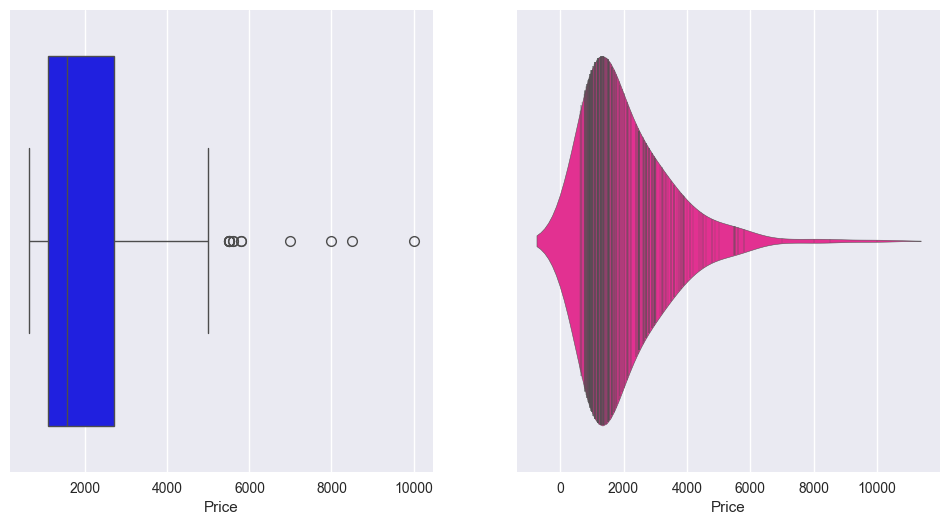

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=df_idealista["Price"], color="b");
plt.subplot(1,2,2)
sns.violinplot(x=df_idealista["Price"], color='deeppink',bw_method=.5, inner="stick");


Text(0.5, 1.0, 'Numero de piso')

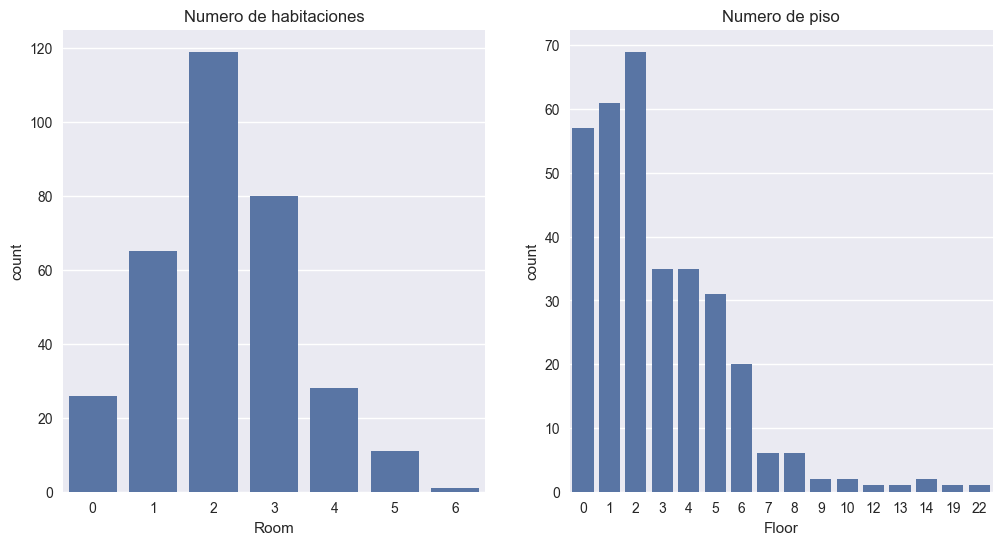

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=df_idealista["Room"]);
plt.title("Numero de habitaciones")
plt.subplot(1,2,2)
sns.countplot(x=df_idealista["Floor"]);
plt.title("Numero de piso")


In [15]:
df_idealista['Room'].value_counts().sort_values(ascending=False)

Room
2    119
3     80
1     65
4     28
0     26
5     11
6      1
Name: count, dtype: int64

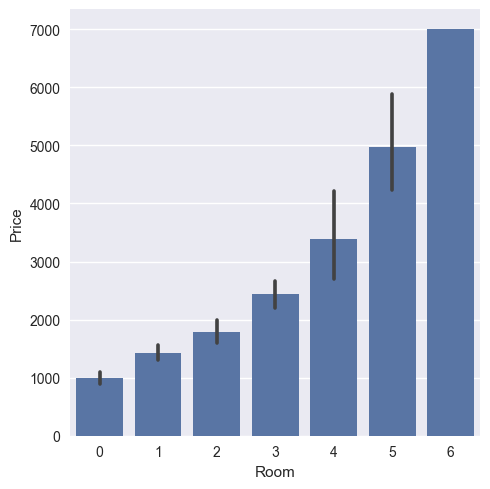

In [16]:
sns.catplot(df_idealista, y='Price', x='Room', kind="bar")

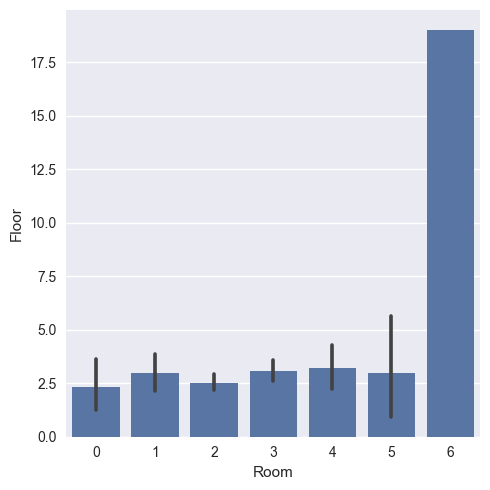

In [17]:
sns.catplot(df_idealista, y='Floor', x='Room', kind="bar")

In [18]:
df_m2 = df_idealista["m2"].describe()

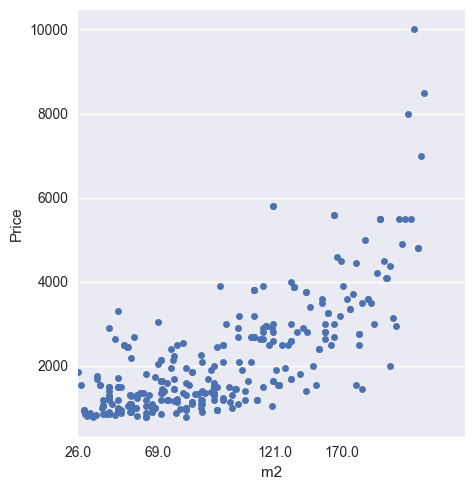

In [19]:
sns.catplot(df_idealista, x='m2', y='Price', kind="strip");
plt.xlim([0, df_m2["75%"]])
plt.xticks([0,df_m2["min"],df_m2["25%"], df_m2["50%"],df_m2["75%"]]);

In [20]:
df_idealista.columns

Index(['Direction', 'Price', 'm2', 'Floor', 'Room', 'Description'], dtype='object')

/var/folders/28/8cl0hx0s7wn3jhrkn9jsr1780000gp/T/ipykernel_82726/101829125.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_idealista["Room"] , color="skyblue",kde=True, label="Rooms")
/var/folders/28/8cl0hx0s7wn3jhrkn9jsr1780000gp/T/ipykernel_82726/101829125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

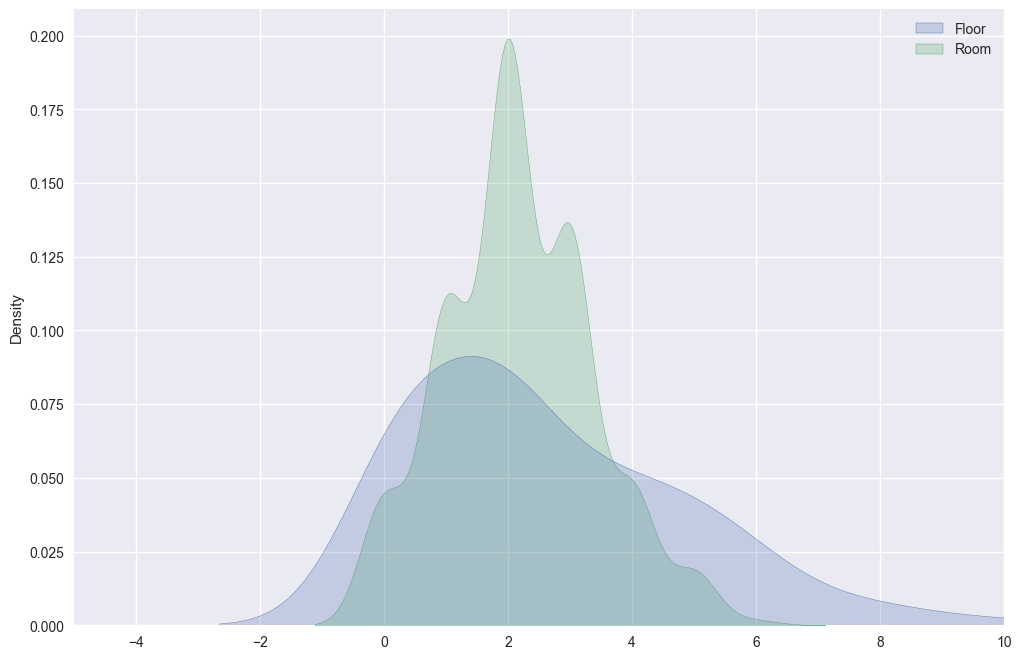

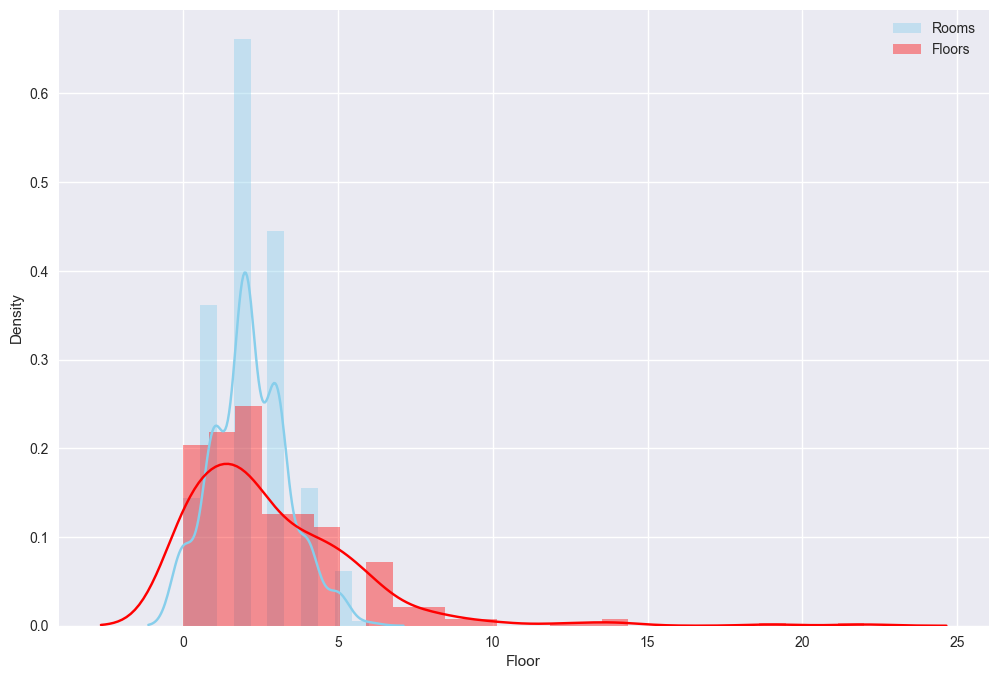

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_idealista[df_idealista.columns.values[3:5]], fill=True);
plt.xlim(-5,10)
plt.figure(figsize=(12,8))
sns.distplot(df_idealista["Room"] , color="skyblue",kde=True, label="Rooms")
sns.distplot(df_idealista["Floor"] , color="red", kde=True, label="Floors")
#sns.histplot(df_idealista["Room"] , color="skyblue",kde=True, label="Rooms")
#sns.histplot(df_idealista["Floor"] , color="red", kde=True, label="Floors")
plt.legend();

In [22]:
df_idealista[df_idealista["Price"] > 9000]

,Direction,Price,m2,Floor,Room,Description
181,"Piso en calle de Claudio Coello, Castellana, ...",10000.0,400.0,7,4,Se alquila sin muebles! Ya esta disponible pa...


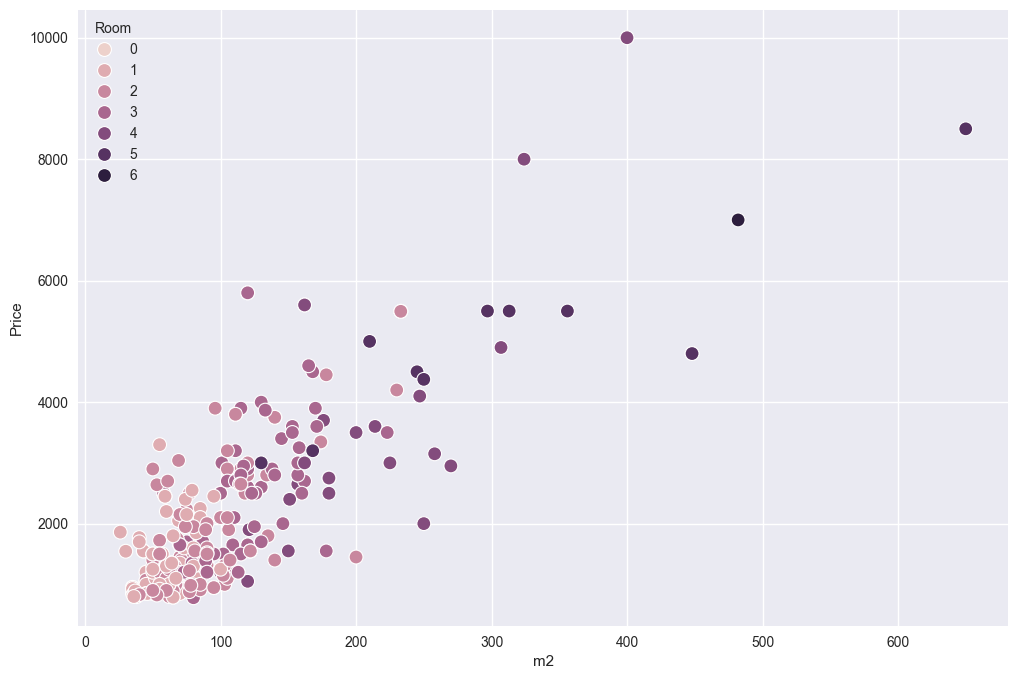

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_idealista['m2'],
                y=df_idealista['Price'],
                hue = df_idealista['Room'],
               s=100);

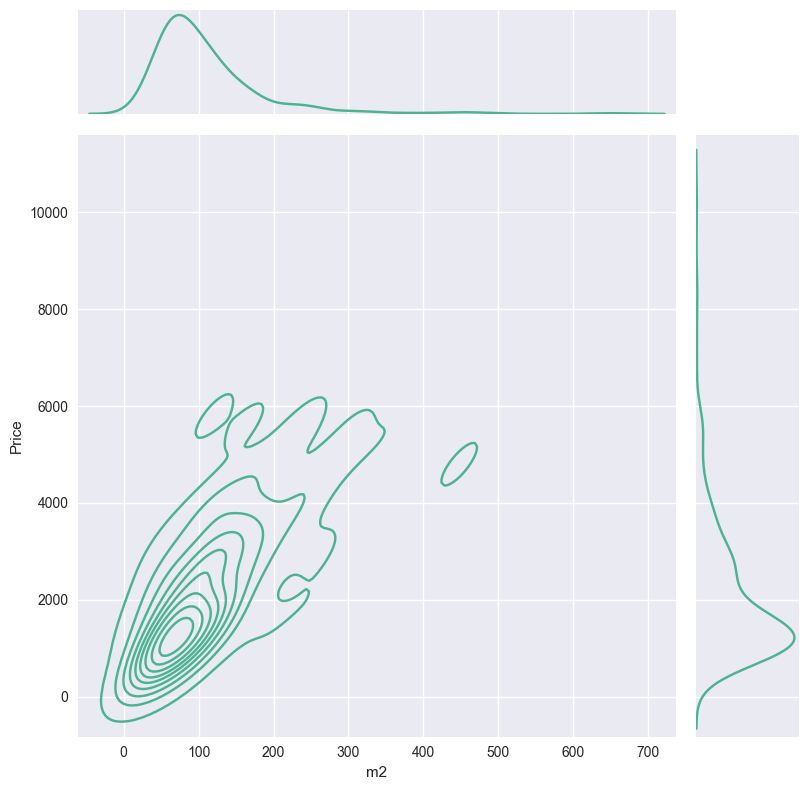

In [24]:
sns.jointplot(x=df_idealista['m2'],
            y=df_idealista['Price'],
            color="#4CB391",
            kind="kde",
            height = 8);

In [25]:
df_nums = df_idealista.loc[:,"Price":"Room"]

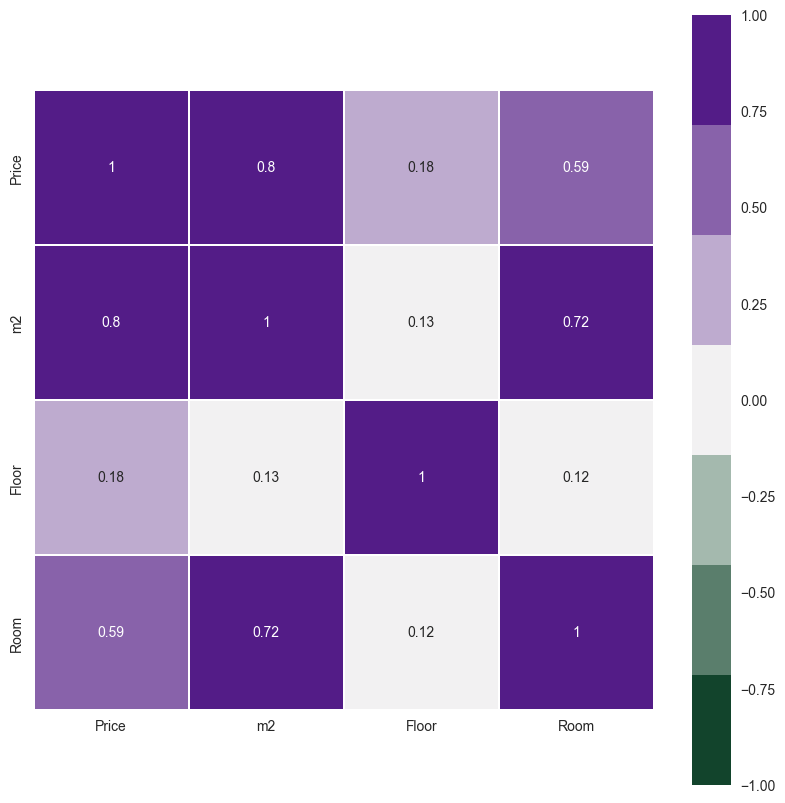

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_nums.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

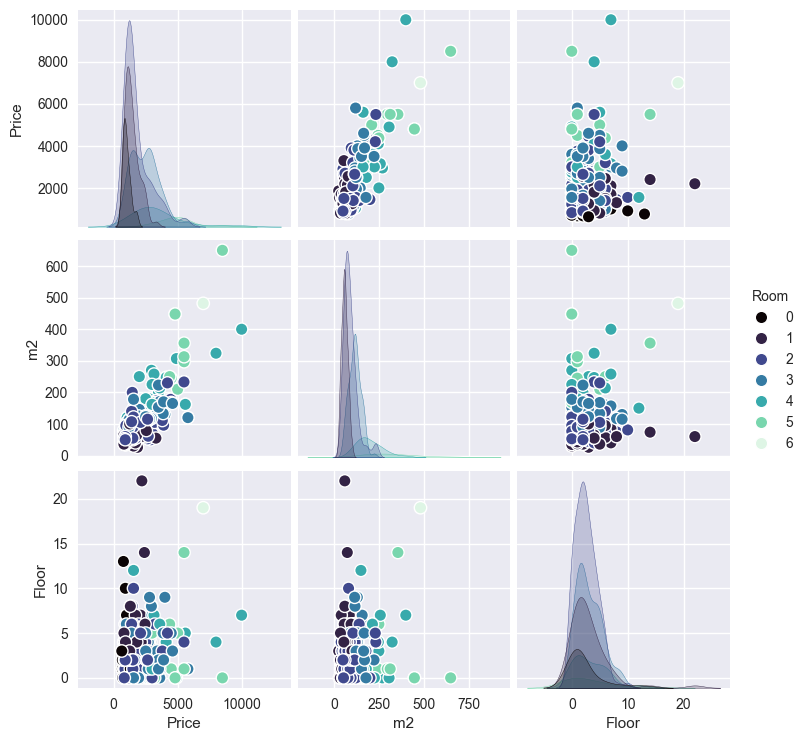

In [27]:
sns.pairplot(df_idealista,
             kind="scatter",
             hue="Room",
             palette="mako",
             plot_kws=dict(s=80, linewidth=1.));


In [28]:
df_idealista['Room'].unique()[0]

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


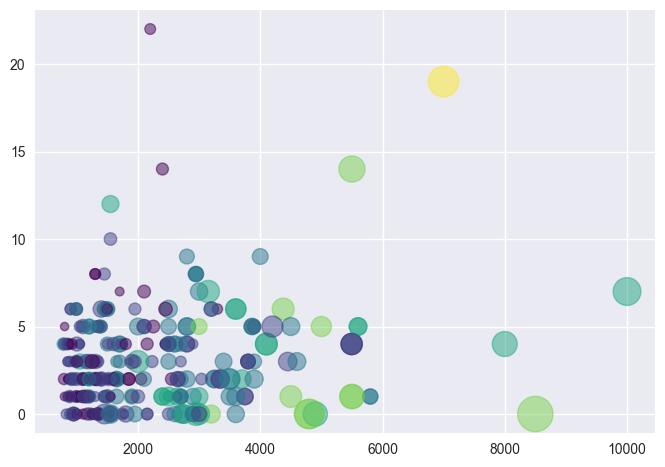

In [29]:
plt.scatter(data=df_idealista, x="Price", y="Floor", label=None,
            c="Room", cmap='viridis',
            s="m2", linewidth=1, alpha=0.5)
df_idealista['Room'].unique()[0]
plt.legend()

In [30]:
df_idealista

,Direction,Price,m2,Floor,Room,Description
0,"Estudio en calle de Tarragona, 36, Palos de M...",675.0,NaN,1,0,"Estudio, cocina equipada con electrodoméstico..."
1,"Piso en paseo de Santa María de la Cabeza, Pa...",2700.0,111.0,1,3,Piso Reformado con Patio Privativo en el Cent...
2,"Piso en calle Gran Via de Hortaleza, 5, Pinar...",1650.0,120.0,2,3,"Piscina de invierno y de verano, gimnasio, 2 ..."
3,"Piso en calle del Conde de Xiquena, Chueca-Ju...",5495.0,233.0,4,2,MARAVILLOSO Y LUMINOSO APARTAMENRO DE 2 HABIT...
4,"Piso en calle de José Gutiérrez Maroto, 3, En...",900.0,67.0,6,2,Piso en muy buen estado y muy soleado. Junto ...
...,...,...,...,...,...,...
325,"Piso en Castellana, Madrid",4200.0,230.0,5,2,La Inmobiliaria Internacional CPM gestiona es...
326,"Piso en German Pérez Carrasco, Quintana, Madrid",900.0,50.0,2,2,"¿Estás buscando una vivienda luminosa, recién..."
327,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...
328,"Estudio en calle del Manco de Lepanto, Numanc...",630.0,NaN,3,0,POR FAVOR LEER TODA LA DESCRIPCIÓN DEL ANUNCI...


In [32]:
df_dir_mad = df_idealista.copy()
df_dir_mad["N_direction"] = df_dir_mad["Direction"].str.extract(r'(\d+)')
df_dir_mad = df_dir_mad[df_dir_mad["N_direction"].notna()]
direction_place =  df_dir_mad["Direction"].str.split(",")
for x in direction_place:
    for i,n_x in enumerate(x):
        if i == 2:
            x.pop(i)

dic = {'Street': [], 'N_direction': [], 'City': []}
for l in direction_place:
    dic['Street'].append(l[0].strip())
    dic['N_direction'].append(l[1].strip())
    dic['City'].append(l[2].strip())
dic
df_dir_mad["Street"] = dic["Street"]
df_dir_mad["N_direction"] = dic["N_direction"]
df_dir_mad["City"] = dic["City"]

df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Piso en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Ático en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Dúplex en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("Estudio en ", "")
df_dir_mad["Street"] = df_dir_mad["Street"].str.replace("de ", "")

df_dir_mad

In [33]:
place = df_dir_mad.loc[4,"City"] + ", " + df_dir_mad.loc[4,"Street"] + ", " + df_dir_mad.loc[4,"N_direction"]
address = geocoder.osm(place)
address
place


'Madrid, calle José Gutiérrez Maroto, 3'

In [34]:
address

<[OK] Osm - Geocode [Calle de José Gutiérrez Maroto, Ensanche de Vallecas, Villa de Vallecas, Madrid, Comunidad de Madrid, 28051, España]>

In [35]:
df_dir_mad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direction    112 non-null    object 
 1   Price        112 non-null    float64
 2   m2           103 non-null    float64
 3   Floor        112 non-null    int64  
 4   Room         112 non-null    int64  
 5   Description  109 non-null    object 
 6   N_direction  112 non-null    object 
 7   Street       112 non-null    object 
 8   City         112 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.8+ KB


In [36]:

# map
map_mad = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=12,
                #  width=700,
                #  height=500,
                 control_scale=True)
# plot rents madrid locations
for (index, row) in df_dir_mad.iterrows():
    try:
        place = row.loc["City"] + ", " + row.loc["Street"] + ", " + row.loc["N_direction"]
        address = geocoder.osm(place)
        addr_lat = address.lat
        addr_lng = address.lng
        # add marker to map
        folium.Marker(location = [addr_lat, addr_lng],
                    popup = place + ' ' + str(row['Price']) + '€, ' + str(row['m2']) + "m\u00B2",
                    tooltip = 'click',
                    icon=folium.Icon(icon="glyphicon-home", prefix='glyphicon')).add_to(map_mad)
    except:
        print(place)

# display map
display(map_mad)

Madrid, calle Gran Via Hortaleza, 5
Madrid, calle Gran Via Hortaleza, 5
Madrid, calle del AlcalSáinz Baranda, 4
Madrid, calle los Fundadores, 23
Madrid, avenida Cerro Valdecahonde, 18
Madrid, calle del Balcón Corralejos, 8
Madrid, avenida la Gran Vía del Sureste, 33
Madrid, avenida cerro valdecahonde, 26


In [37]:
# add geojson file to map
folium.GeoJson('../../data/LímitesdelosBarriosAdministrativosdeMadrid.geojson',
                name='geojson Madrid Barrios',).add_to(map_mad)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_mad)

# display map
map_mad

In [38]:

df_dir_mad["lat"] = df_dir_mad.apply(lambda row: geocoder.osm(f"{row['City']}, {row['Street']}, {row['N_direction']}").lat, axis=1)
df_dir_mad["lng"] = df_dir_mad.apply(lambda row: geocoder.osm(f"{row['City']}, {row['Street']}, {row['N_direction']}").lng, axis=1)

In [40]:
df_dir_mad.dropna(axis=0,inplace=True)
df_dir_mad

,Direction,Price,m2,Floor,Room,Description,N_direction,Street,City,lat,lng
4,"Piso en calle de José Gutiérrez Maroto, 3, En...",900.0,67.0,6,2,Piso en muy buen estado y muy soleado. Junto ...,3,calle José Gutiérrez Maroto,Madrid,40.365784,-3.603566
6,"Piso en calle Topete, 11, Bellas Vistas, Madrid",2500.0,58.0,1,3,ALQUILER TEMPORAL! 1 A 11 MESES. Para entrar ...,11,calle Topete,Madrid,40.449386,-3.704770
8,"Piso en calle de Embajadores, 91, Delicias, M...",1050.0,45.0,4,2,¡NO INMOBILIARIAS! ALQUILA DIRECTAMENTE LA PR...,91,calle Embajadores,Madrid,40.400209,-3.698529
10,"Piso en calle de Écija, 7, Argüelles, Madrid",3250.0,158.0,2,3,Exclusiva vivienda con reforma integral recié...,7,calle Écija,Madrid,40.431478,-3.723499
16,"Piso en José María de Castro, 1, Cuatro Camin...",950.0,35.0,3,1,"Se Alquila Temporalmente por días, semanas, q...",1,José María Castro,Madrid,40.452370,-3.700101
...,...,...,...,...,...,...,...,...,...,...,...
322,"Piso en calle Raza, 4, Canillejas, Madrid",900.0,60.0,2,2,GRUPO INTERPRES alquila en exclusiva este pis...,4,calle Raza,Madrid,40.447419,-3.612003
323,"Piso en calle de Núñez de Balboa, 12, Recolet...",4500.0,168.0,5,3,Viba Real Estate ofrece esta magnífica vivien...,12,calle Núñez Balboa,Madrid,40.422908,-3.682822
324,"Piso en calle de Voluntarios Macabebes, 3, Ch...",825.0,53.0,0,2,Se alquila vivienda de 53m2 (48m útiles según...,3,calle Voluntarios Macabebes,Madrid,40.393007,-3.695478
327,"Piso en calle de Hermosilla, 18, Recoletos, M...",3900.0,170.0,2,3,MAGNÍFICA VIVIENDA EN PLENO BARRIO DE SALAMAN...,18,calle Hermosilla,Madrid,40.426357,-3.686140


In [41]:
df_dir_mad.to_csv("../../data/rentaMadridDatosLimpios.csv", sep=";")